#Основные понятия  
**Генерация признаков (Feature Engineering):**

- Важность признаков: Признаки являются входными данными для модели машинного обучения и играют ключевую роль в ее производительности.
- Создание новых признаков: Процесс создания новых признаков из существующих данных с помощью различных методов, таких как разделение, объединение, преобразование и т.д.
- Типы признаков: Числовые (непрерывные и дискретные), категориальные, текстовые, изображения и др.

**Методы отбора признаков (Feature Selection):**

- Фильтрация признаков: Методы, основанные на статистических показателях, таких как корреляция, дисперсия, взаимная информация и т.д.
- Обертка (Wrapper): Методы, использующие саму модель машинного обучения для оценки подмножеств признаков (прямой или обратный отбор признаков).
- Внедренный отбор (Embedded): Методы, совмещающие процесс обучения модели и отбора признаков (например, LASSO, Ridge).  

**Подбор гиперпараметров (Hyperparameter Tuning):**

- Гиперпараметры: Параметры, задаваемые перед обучением модели и влияющие на процесс обучения и производительность модели.
- Перекрестная проверка: Используется для оценки производительности модели при различных значениях гиперпараметров.
- Методы подбора: Сетка параметров (Grid Search), случайный поиск (Random Search), байесовская оптимизация (Bayesian Optimization) и др.

##Задание 1
**Подготовка и предобработка данных для моделирования**

Цель: Подготовить данные о недвижимости для последующего анализа с помощью методов машинного обучения.

1. Загрузка данных: Импортируйте датасет, используя библиотеку pandas и просмотрите базовую информацию о структуре и типах данных.

2. Удаление дубликатов и обработка пропусков: Проверьте данные на наличие дубликатов и удалите их. Оцените, какие колонки содержат пропущенные значения и разработайте стратегию их обработки, например, заполнение медианными значениями или удаление строк/столбцов.

3.  Категоризация текстовых данных: Для всех текстовых переменных, таких как `job_title` и `company_location`, проведите процедуру очистки текста (например, удаление лишних символов, приведение к нижнему регистру) и преобразуйте их в категориальные признаки методом кодировки.

4. Нормализация числовых данных: Для числовых данных, таких как `remote_ratio`, выполните масштабирование данных, чтобы улучшить качество последующих аналитических моделей.




In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [ ]:
df = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
df.drop(['salary', 'salary_currency', 'employment_type', 'employee_residence'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3755 non-null   int64 
 1   experience_level  3755 non-null   object
 2   job_title         3755 non-null   object
 3   salary_in_usd     3755 non-null   int64 
 4   remote_ratio      3755 non-null   int64 
 5   company_location  3755 non-null   object
 6   company_size      3755 non-null   object
dtypes: int64(3), object(4)
memory usage: 205.5+ KB


In [ ]:
df['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [ ]:
df['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

In [ ]:
df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [ ]:
unique_job_titles = df['job_title'].unique().tolist()
unique_job_titles

['Principal Data Scientist',
 'ML Engineer',
 'Data Scientist',
 'Applied Scientist',
 'Data Analyst',
 'Data Modeler',
 'Research Engineer',
 'Analytics Engineer',
 'Business Intelligence Engineer',
 'Machine Learning Engineer',
 'Data Strategist',
 'Data Engineer',
 'Computer Vision Engineer',
 'Data Quality Analyst',
 'Compliance Data Analyst',
 'Data Architect',
 'Applied Machine Learning Engineer',
 'AI Developer',
 'Research Scientist',
 'Data Analytics Manager',
 'Business Data Analyst',
 'Applied Data Scientist',
 'Staff Data Analyst',
 'ETL Engineer',
 'Data DevOps Engineer',
 'Head of Data',
 'Data Science Manager',
 'Data Manager',
 'Machine Learning Researcher',
 'Big Data Engineer',
 'Data Specialist',
 'Lead Data Analyst',
 'BI Data Engineer',
 'Director of Data Science',
 'Machine Learning Scientist',
 'MLOps Engineer',
 'AI Scientist',
 'Autonomous Vehicle Technician',
 'Applied Machine Learning Scientist',
 'Lead Data Scientist',
 'Cloud Database Engineer',
 'Financial

In [ ]:
import pandas as pd

job_categories = {
    'Data Scientist': ['Data Scientist', 'Applied Data Scientist', 'Data Scientist Lead'],
    'Machine Learning Engineer': ['ML Engineer', 'Machine Learning Researcher', 'Lead Machine Learning Engineer'],
    'Data Analyst': ['Data Analyst', 'Business Data Analyst', 'Marketing Data Analyst'],
    'Data Engineer': ['Data Engineer', 'Big Data Engineer', 'Lead Data Engineer'],
    'Research Scientist': ['Research Scientist', 'ML Researcher', 'Deep Learning Researcher'],
    'Manager': ['Data Analytics Manager', 'Head of Data', 'Machine Learning Manager'],
    'Engineer': ['Software Data Engineer', 'Data DevOps Engineer', 'Cloud Database Engineer'],
    'AI Specialist': ['AI Developer', 'AI Scientist', 'AI Programmer'],
    'Architect': ['Data Architect', 'Big Data Architect', 'Cloud Data Architect']
}

# Создаем новый столбец `job_category`
df['job_category'] = 'Other'  # Значение по умолчанию для тех профессий, которые не попали в список

for category, titles in job_categories.items():
    df.loc[df['job_title'].isin(titles), 'job_category'] = category

print(df[['job_title', 'job_category']].head())

                  job_title               job_category
0  Principal Data Scientist                      Other
1               ML Engineer  Machine Learning Engineer
2               ML Engineer  Machine Learning Engineer
3            Data Scientist             Data Scientist
4            Data Scientist             Data Scientist


In [ ]:
df['job_category'].value_counts()

job_category
Data Engineer                1057
Other                         915
Data Scientist                852
Data Analyst                  629
Architect                     104
Research Scientist             83
Machine Learning Engineer      43
Manager                        35
AI Specialist                  29
Engineer                        8
Name: count, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Создание экземпляра TfidfVectorizer
vectorizer = TfidfVectorizer()

# Преобразование документов в TF-IDF векторы
tfidf_matrix = vectorizer.fit_transform(df['job_category'])
# Просмотр результатов
print(tfidf_matrix)

# Для получения словаря терминов
print(vectorizer.get_feature_names_out())

  (0, 8)	1.0
  (1, 4)	0.27691251443301046
  (1, 5)	0.6794554655569369
  (1, 6)	0.6794554655569369
  (2, 4)	0.27691251443301046
  (2, 5)	0.6794554655569369
  (2, 6)	0.6794554655569369
  (3, 10)	0.8641387211938606
  (3, 3)	0.50325368407339
  (4, 10)	0.8641387211938606
  (4, 3)	0.50325368407339
  (5, 8)	1.0
  (6, 8)	1.0
  (7, 10)	0.8641387211938606
  (7, 3)	0.50325368407339
  (8, 10)	0.8641387211938606
  (8, 3)	0.50325368407339
  (9, 10)	0.8641387211938606
  (9, 3)	0.50325368407339
  (10, 10)	0.8641387211938606
  (10, 3)	0.50325368407339
  (11, 1)	0.8945698393255103
  (11, 3)	0.4469281850243177
  (12, 1)	0.8945698393255103
  (12, 3)	0.4469281850243177
  :	:
  (3739, 3)	0.5311373143262965
  (3739, 4)	0.8472857565958778
  (3740, 8)	1.0
  (3741, 10)	0.8641387211938606
  (3741, 3)	0.50325368407339
  (3742, 10)	0.8641387211938606
  (3742, 3)	0.50325368407339
  (3743, 3)	0.5311373143262965
  (3743, 4)	0.8472857565958778
  (3744, 8)	1.0
  (3745, 8)	1.0
  (3746, 10)	0.8641387211938606
  (3746, 3)

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Конкатенируем исходный DataFrame с новым DataFrame векторов TF-IDF
df = pd.concat([df, tfidf_df], axis=1).drop('job_category', axis=1)

In [ ]:
df.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist
0,2023,SE,Principal Data Scientist,85847,100,ES,L,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
1,2023,MI,ML Engineer,30000,100,US,S,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0
2,2023,MI,ML Engineer,25500,100,US,S,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0
3,2023,SE,Data Scientist,175000,100,CA,M,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0
4,2023,SE,Data Scientist,120000,100,CA,M,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0


In [ ]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

- EN (Entry Level) - начальный уровень опыта работы. Это может быть для людей, только начинающих свою карьеру или имеющих минимальный опыт работы в данной области.

- EX (Executive Level) - высокий уровень опыта работы. Это обусловлено тем, что в данном случае количество участников с уровнем опыта EX значительно меньше, что указывает на более высокий и специализированный уровень работы.

In [ ]:
df.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
selected_columns = df.loc[:, ['company_size', 'experience_level']]
# Создание LabelEncoder объекта
label_encoder = LabelEncoder()

# Кодирование столбцов
encoded_columns = {}
for column in selected_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    # Сохраняем маппинг
    encoded_columns[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Вывод DataFrame
display(df)

# Вывод легенды кодировки для каждого столбца
for column, mapping in encoded_columns.items():
    print(f"Кодировка для {column}:", mapping)

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,ai,analyst,architect,...,engineer,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded
0,2023,SE,Principal Data Scientist,85847,100,ES,L,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3
1,2023,MI,ML Engineer,30000,100,US,S,0.0,0.00000,0.0,...,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2
2,2023,MI,ML Engineer,25500,100,US,S,0.0,0.00000,0.0,...,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2
3,2023,SE,Data Scientist,175000,100,CA,M,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3
4,2023,SE,Data Scientist,120000,100,CA,M,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,Data Scientist,412000,100,US,L,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,0,3
3751,2021,MI,Principal Data Scientist,151000,100,US,L,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,2
3752,2020,EN,Data Scientist,105000,100,US,S,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,2,0
3753,2020,EN,Business Data Analyst,100000,100,US,L,0.0,0.89457,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0


Кодировка для company_size: {'L': 0, 'M': 1, 'S': 2}
Кодировка для experience_level: {'EN': 0, 'EX': 1, 'MI': 2, 'SE': 3}


In [ ]:
df.company_location.value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

In [ ]:
# Вычисляем количество встречаемости каждого уникального значения в колонке
location_counts = df['company_location'].value_counts()

# Закодируем 'company_location' на основе количества встречаемости
df['location_encoded'] = df['company_location'].map(location_counts)

df.drop(['company_location', 'company_size', 'job_title',
         'experience_level'], axis = 1, inplace=True)

In [ ]:
df.head()

,work_year,salary_in_usd,remote_ratio,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded,location_encoded
0,2023,85847,100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3,77
1,2023,30000,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040
2,2023,25500,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040
3,2023,175000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87
4,2023,120000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87


##Задание 2
Цель: создание новых признаков на основе имеющихся

 - Создание признаков, основанных на дате:
  - Из признака 'work_year' создайте новый признак, который отражает количество лет опыта до текущего года, что может быть ценной информацией для предсказания заработной платы.

- Разделите 'salary_in_usd' и 'remote_ratio' на категории, чтобы исследовать, как различные диапазоны зарплат и уровни удаленной работы коррелируют с другими переменными.

- Создайте категориальный признак, который классифицирует комбинации зарплаты и удалённой работы в типы условий труда

- Произведите разбиение данных на тренировочный и тестовый наборы с использованием функции `train_test_split`. Убедитесь, что все категориальные признаки преобразованы в формат, подходящий для обучения модели.

In [ ]:
from datetime import datetime
# Получаем текущий год
current_year = datetime.now().year
df['years_of_experience'] = current_year - df['work_year']
df.head()

,work_year,salary_in_usd,remote_ratio,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded,location_encoded,years_of_experience
0,2023,85847,100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3,77,1
1,2023,30000,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040,1
2,2023,25500,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040,1
3,2023,175000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87,1
4,2023,120000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87,1


Для создания комбинированного признака, который учитывает как уровень зарплаты, так и долю удалённой работы, можно применить взвешенную сумму с предварительной нормализацией данных. Возьмём за основу следующий подход:

1. Нормализуйте данные зарплаты и доли удалённой работы, чтобы оба признака взаимодействовали на равных условиях.
2. Определите веса для каждого признака в зависимости от их важности.
3. Вычислите взвешенную сумму для получения нового признака.




In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Нормализация данных
scaler = MinMaxScaler()
df_scale = df[['salary_in_usd', 'remote_ratio']]
df_scale[['salary_in_usd', 'remote_ratio']] = scaler.fit_transform(df[['salary_in_usd', 'remote_ratio']])

# Выставление весов
salary_weight = 0.7  # Больший вес, так как зарплата важнее
remote_weight = 0.3  # Меньший вес

# Вычисление взвешенной суммы
df['combined_metric'] = df_scale['salary_in_usd'] * salary_weight + df_scale['remote_ratio'] * remote_weight

df.head()


,work_year,salary_in_usd,remote_ratio,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded,location_encoded,years_of_experience,combined_metric
0,2023,85847,100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3,77,1,0.427005
1,2023,30000,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040,1,0.339130
2,2023,25500,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040,1,0.332049
3,2023,175000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87,1,0.567287
4,2023,120000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87,1,0.480745


Для создания категориального признака, который классифицирует комбинации зарплаты и удалённой работы в типы условий труда, можно сначала анализировать распределения каждого признака для определения разумных границ разделения на категории.

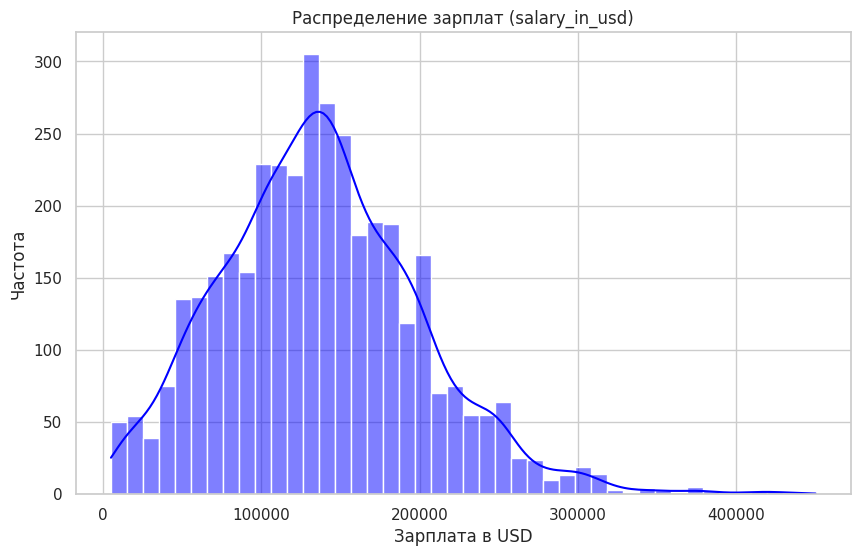

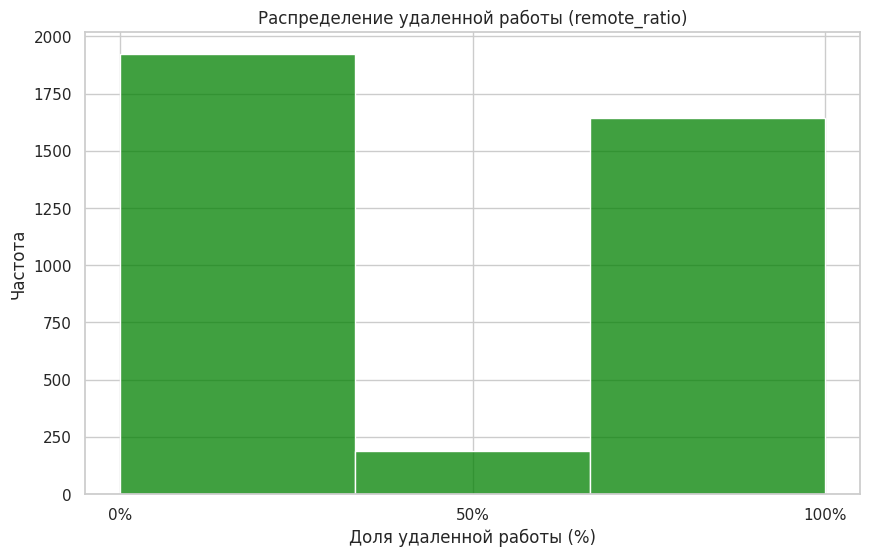

In [ ]:
# Установка темы для картинок
sns.set(style='whitegrid')

# Визуализация распределения salary_in_usd
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='blue')
plt.title('Распределение зарплат (salary_in_usd)')
plt.xlabel('Зарплата в USD')
plt.ylabel('Частота')
plt.show()

# Визуализация распределения remote_ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['remote_ratio'], bins=3, kde=False, color='green')  # bins соответствует количеству уникальных категорий
plt.title('Распределение удаленной работы (remote_ratio)')
plt.xlabel('Доля удаленной работы (%)')
plt.ylabel('Частота')
plt.xticks([0, 50, 100], ['0%', '50%', '100%'])  # Предполагаем, что remote_ratio использует шкалу 0-100
plt.show()

Описание распределения указывает на то, что данные по зарплате сконцентрированы, а по удаленности работы имеют два пика в 0% и 100%. Исходя из этого, можно предложить следующий подход:

1. Разделение на категории зарплат:
   - Низкая: зарплата ≤ 25-й перцентиль.
   - Средняя: зарплата > 25-й и ≤ 75-й перцентиль.
   - Высокая: зарплата > 75-й перцентиль.

2. Разделение на категории удаленной работы:
   - Без удаленной работы: 0%.
   - Частичная удаленная работа: больше 0% и меньше 100%.
   - Полная удаленная работа: 100%.

С учётом этих категорий, можно создать новый признак:

In [ ]:
df_copy = df.copy()
# Устанавливаем границы для категоризации зарплат
salary_bins = [df['salary_in_usd'].min(),
               df['salary_in_usd'].quantile(0.25),
               df['salary_in_usd'].quantile(0.75),
               df['salary_in_usd'].max()]
salary_labels = ['Low', 'Medium', 'High']

df_copy['salary_category'] = pd.cut(df_copy['salary_in_usd'], bins=salary_bins, labels=salary_labels, include_lowest=True)

# Устанавливаем категории удаленной работы
df_copy['remote_category'] = pd.cut(df_copy['remote_ratio'], bins=[0, 1, 99, 100], right=False,
                               labels=['No remote', 'Partial remote', 'Full remote'])

# Создаем комбинированный признак
df_copy['work_conditions'] = df_copy['salary_category'].astype(str) + ' salary with ' + df_copy['remote_category'].astype(str)

df_copy.head()

,work_year,salary_in_usd,remote_ratio,ai,analyst,architect,data,engineer,learning,machine,...,scientist,specialist,company_size_encoded,experience_level_encoded,location_encoded,years_of_experience,combined_metric,salary_category,remote_category,work_conditions
0,2023,85847,100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0,3,77,1,0.427005,Low,NaN,Low salary with nan
1,2023,30000,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,...,0.000000,0.0,2,2,3040,1,0.339130,Low,NaN,Low salary with nan
2,2023,25500,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,...,0.000000,0.0,2,2,3040,1,0.332049,Low,NaN,Low salary with nan
3,2023,175000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,...,0.864139,0.0,1,3,87,1,0.567287,Medium,NaN,Medium salary with nan
4,2023,120000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,...,0.864139,0.0,1,3,87,1,0.480745,Medium,NaN,Medium salary with nan


In [ ]:
df_copy.work_conditions.value_counts()

work_conditions
Medium salary with No remote         1054
Medium salary with nan                769
High salary with No remote            495
Low salary with nan                   448
High salary with nan                  426
Low salary with No remote             374
Low salary with Partial remote        134
Medium salary with Partial remote      44
High salary with Partial remote        11
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Задание 3

**Оценка и оптимизация регрессионной модели для предсказания зарплаты на основании выбранных признаков.**
1. Анализ эффективности исходной модели: Изучите результаты, полученные из базовой модели дерева решений на тренировочных и тестовых данных. Оцените переобучение модели по различию показателей R^2
 на тренировочной и тестовой выборках.

2. Отбор признаков с использованием RFE: Используйте RFE для выбора оптимального количества признаков, значимых для модели. Анализируйте, как изменение количества признаков влияет на качество модели.

3. Обучение оптимизированной модели: По результатам RFE обучите новую модель дерева решений на выделенных ключевых признаках. Сравните результаты R^2
 новой модели с исходной на тренировочных и тестовых данных.

4. Анализ важности признаков: Изучите важность признаков, которые модель считает наиболее информативными, и попытайтесь интерпретировать, почему именно эти признаки важны.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   work_year                 3755 non-null   int64  
 1   salary_in_usd             3755 non-null   int64  
 2   remote_ratio              3755 non-null   int64  
 3   ai                        3755 non-null   float64
 4   analyst                   3755 non-null   float64
 5   architect                 3755 non-null   float64
 6   data                      3755 non-null   float64
 7   engineer                  3755 non-null   float64
 8   learning                  3755 non-null   float64
 9   machine                   3755 non-null   float64
 10  manager                   3755 non-null   float64
 11  other                     3755 non-null   float64
 12  research                  3755 non-null   float64
 13  scientist                 3755 non-null   float64
 14  speciali

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)
prediction = tree.predict(X_test)

print(f'R^2 на тренировочных данных {r2_score(y_train, tree.predict(X_train))}')
print(f'R^2 на тестовых данных {r2_score(y_test, tree.predict(X_test))}')

R^2 на тренировочных данных 1.0
R^2 на тестовых данных 0.9784991590672806


In [ ]:
from sklearn.feature_selection import RFE
# Создаем RFE модель и выбираем 3 признака
rfe = RFE(estimator=tree, n_features_to_select=10)
rfe = rfe.fit(X, y)

# Показываем какие признаки выбраны
selected_features = pd.DataFrame({
    'Feature': X.columns,  # Здесь X.columns должен содержать названия столбцов, использованных для X
    'Ranking': rfe.ranking_
})
print(selected_features.sort_values(by='Ranking', ascending=False))

                     Feature  Ranking
8                    machine       10
9                    manager        9
11                  research        8
7                   learning        7
4                  architect        6
2                         ai        5
13                specialist        4
3                    analyst        3
6                   engineer        2
17       years_of_experience        1
16          location_encoded        1
15  experience_level_encoded        1
14      company_size_encoded        1
0                  work_year        1
12                 scientist        1
10                     other        1
1               remote_ratio        1
5                       data        1
18           combined_metric        1


In [ ]:
top_features = selected_features.sort_values(by='Ranking', ascending=False)[:11]
X_train_selected = X_train[top_features.Feature]
X_test_selected = X_test[top_features.Feature]

# Обучение дерева решений на отобранных признаках
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_selected, y_train)
print(f'R^2 на тренировочных данных {r2_score(y_train, dt.predict(X_train_selected))}')
print(f'R^2 на тестовых данных {r2_score(y_test, dt.predict(X_test_selected))}')

R^2 на тренировочных данных 0.37997910522590517
R^2 на тестовых данных 0.2885470859616476


In [ ]:
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)

# Отбор 10 наиболее важных признаков
top_features = feature_importances.nlargest(10).index
top_features

Index(['combined_metric', 'location_encoded', 'remote_ratio', 'work_year',
       'experience_level_encoded', 'scientist', 'research',
       'years_of_experience', 'company_size_encoded', 'analyst'],
      dtype='object')

## Задание 4

Сравните два подхода к оптимизации гиперпараметров для модели дерева решений, применяемой к задаче регрессии. Используйте  GridSearchCV и BayesSearchCV, чтобы найти лучшие параметры для модели на предоставленных данных. Анализируйте и сравнивайте результаты, полученные каждым методом, и определите, какой из них более эффективен в данном контексте.

1. Настройка и обучение модели с использованиом GridSearchCV: Настройте гиперпараметры дерева решений с помощью GridSearchCV. Оцените R^2 для лучшей модели.

2. Настройка и обучение модели с использованием BayesSearchCV: Примените BayesSearchCV для настройки гиперпараметров. Сравните полученную лучшую оценку R^2 с результатом, полученным через GridSearchCV.

3. Сравнение и анализ результатов: Сравните результаты, полученные обоими методами, и проведите анализ, чтобы выяснить, какой метод показал себя лучше в данной задаче. Проанализируйте, какие гиперпараметры оказали наибольшее влияние на результаты.


In [ ]:
! pip install scikit-optimize

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV


# Функция для оценки модели с помощью перекрестной проверки
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    return scores.mean()

# Поиск гиперпараметров с помощью сетки параметров
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Лучшие гиперпараметры (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка (Grid Search): {grid_search.best_score_:.2f}")

Лучшие гиперпараметры (Grid Search): {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}
Лучшая оценка (Grid Search): 0.96


In [ ]:
from skopt.space import Real, Categorical, Integer

# Define your model and search space
search_space = {
    "max_depth": Integer(6, 10),
    "max_features": Categorical(['auto', 'sqrt']),
    "min_samples_leaf": Integer(3, 5),
    "min_samples_split": Integer(4, 6),

}

# Initialize BayesSearchCV
clf_bayes = BayesSearchCV(
    estimator=tree,
    search_spaces=search_space,
    random_state=0,
    cv=3,
    verbose=2,
    n_jobs=-1
)
clf_bayes.fit(X, y)

# Get the best hyperparameters and R2 score
best_params = clf_bayes.best_params_
best_r2 = clf_bayes.best_score_

print(f"Лучшие гиперпараметры (Bayesian Optimization): {best_params}")
print(f"Лучшая оценка (Bayesian Optimization): {best_r2:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Исходя из представленных результатов, оба метода оптимизации гиперпараметров (Grid Search и Bayesian Optimization) показали одинаково высокую эффективность с оценкой R^2, равной 0.96. Это говорит о том, что обе настройки смогли подобрать параметры, которые эффективно работают для моделирования с вашими данными.

Оптимальные параметры, найденные обоими методами, указывают на интересные различия между выбранными настройками:
- Grid Search определил `max_depth: 9`, `min_samples_leaf: 1`, `min_samples_split: 5`.
- Bayesian Optimization определил `max_depth: 10`, `max_features: 'auto'`, `min_samples_leaf: 4`, `min_samples_split: 5`.

Параметры `max_depth` и `min_samples_leaf` различаются между двумя подходами. Grid Search выбрал более глубокую максимальную глубину и меньшее минимальное количество примеров в листе, что может указывать на более детализированное разделение данных, в то время как BayesSearchCV показывает склонность к более обобщенной модели с увеличенным значением `min_samples_leaf`.

То, что оба подхода выдали высокие значения R^2, предполагает, что модель хорошо аппроксимирует зависимости в данных, но стоит учитывать возможность переобучения, особенно для модели Grid Search с меньшим значениям минимального количества примеров в листе.

Важно отметить, что байесовская оптимизация предоставила дополнительный параметр `max_features`, который не был рассмотрен в Grid Search. Параметр `max_features`, установленный в 'auto', позволяет модели использовать все признаки при каждом разделении, что может способствовать более точному обучению при большей глубине.


##Домашнее задание

В вашем распоряжении набор данных о качестве сна Sleep_health_and_lifestyle_dataset.csv. Ваша задача - подготовить данные к моделированию, сгенерировать новые признаки, применить методы отбора признаков для улучшения качества предсказательной модели и подобрать оптимальные гиперпараметры для модели регрессии.

1. Предобработка данных:
   - Очистите данные от пропусков и аномалий.
   - Преобразуйте категориальные переменные с помощью One-Hot Encoding или Label Encoding.

2. Генерация новых признаков:
   - Создайте комбинированные признаки, которые могут помочь улучшить модель.
   - Используйте полиномиальные признаки для числовых переменных.

3. Отбор признаков:
   - Примените несколько методов отбора признаков (например, RFE, SelectKBest).
   - Сравните качество модели до и после отбора признаков.

4. Подбор гиперпараметров:
   - Используйте GridSearchCV или RandomizedSearchCV для настройки параметров вашей модели регрессии.
   - Оцените, как изменение гиперпараметров влияет на качество предсказаний.
